<a href="https://colab.research.google.com/github/kumarabhinavthakur274/Kumar_Abhinav_Rossmann_Sales_Prediction_Capstone_Project/blob/main/Kumar_Abhinav_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

**Importing some of the important libraries**

In [75]:
# ignore warnings
import warnings    
warnings.filterwarnings('ignore')

# Modules for dataframe and ndarrays and maths
import pandas as pd
import numpy as np
from datetime import datetime
import math

# visualisation packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'figure.figsize':(8,5),'figure.dpi':100})



# **Data Preparation**

In [76]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# uploading relevent datasets 
df_sales = pd.read_csv("/content/drive/MyDrive/DriveHub/Rossmann Stores Data (1).csv")
df_stores = pd.read_csv("/content/drive/MyDrive/DriveHub/store.csv")

In [78]:
# lets check the data frames
print("Rossman sales dataset: \n")
df_sales.head()

Rossman sales dataset: 



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [79]:
print("Stores dataset: \n")
df_stores.head()

Stores dataset: 



,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [80]:
# checking for null values and the Dtype of the columns in sales dataset
df_sales.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


* Looks like there is no null value in sales data set.
* There are two columns that is Date and StateHoliday which is object other than that everthing is numerical data types.


In [81]:
# checking for null values and the Dtype of the columns in store dataset
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


 * There are missing values in stores dataset which need to be treated.
 * StoreType Assortment and PromoInterval are in object data types and rest others are numerical columns.






**Null Value Treatment**

In [82]:
df_stores.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

There are four columns which contains null values those are following:

**CompetitionDistance**- This is the distance from the nearest competitor store.We will check the distribution of the data according to which we will determine which among mean, median or mode will be suitable to replace the null value with.

**CompetitionOpenSinceMonth**- gives the approximate month of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

**CompetitionOpenSinceYear**- gives the approximate year of the time the nearest competitor was opened, mode of the column would tell us the most occuring month

**Promo2SinceWeek, Promo2SinceYear** and **PromoInterval** are NaN wherever Promo2 is 0 or False as can be seen in the first look of the dataset. They can be replaced with 0.

In [83]:
# replacing null values in Promo2SinceWeek, Promo2SinceYear and PromoInterval columns with vaue 0
promo_list = ['Promo2SinceWeek','Promo2SinceYear','PromoInterval']
for i in promo_list:
  df_stores[i].fillna(value=0,inplace=True)

In [84]:
# replacing null values in CompetitionOpenSinceMonth and CompetitionOpenSinceYear with mode
comp_list = ['CompetitionOpenSinceMonth','CompetitionOpenSinceYear']
for j in comp_list:
  df_stores[j].fillna(df_stores[i].mode()[0],inplace=True)

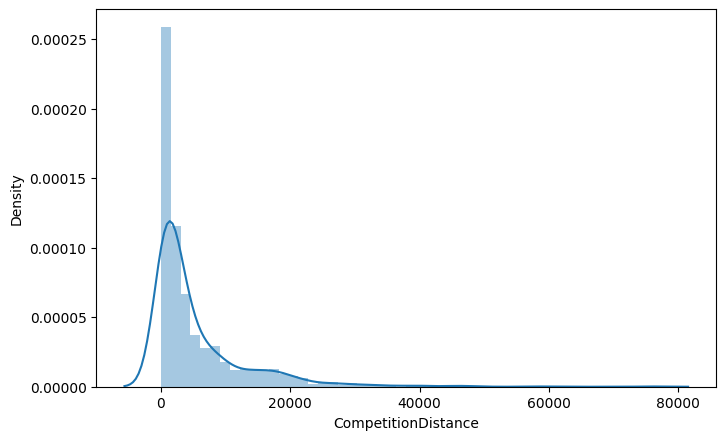

In [85]:
# checking the distribution of CompetitionDistance 
sns.distplot(df_stores["CompetitionDistance"])

Above distribution is right skewed that means median is the most important central tendency to replce the null values with.

In [86]:
# replacing the null values in CompetitionDistance 
df_stores["CompetitionDistance"].fillna(df_stores["CompetitionDistance"].median(),inplace=True)

In [87]:
# lets check the null values again to see the changes we made
df_stores.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

Let us merge both the tables 

In [88]:
# doing left join for merging the sales dataset and store dataset
df_merged = pd.merge(df_sales,df_stores,how="left",on="Store")

In [89]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [90]:
df_merged.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422021e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706918e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [91]:
# checking the columns in new merged dataframe
print(df_merged.columns) 

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


In [92]:
# creating the list of categorical variables in our dataset which may proved to be useful for us
categorical_variable_list = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType',
                             'Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2',
                             'Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [93]:
# checking for unique values in categorical variables
for i in categorical_variable_list:
  print(f'Unique vaue in {i} column is {df_merged[i].unique()} ')
  print("\n")


Unique vaue in DayOfWeek column is [5 4 3 2 1 7 6] 


Unique vaue in Open column is [1 0] 


Unique vaue in Promo column is [1 0] 


Unique vaue in StateHoliday column is ['0' 'a' 'b' 'c' 0] 


Unique vaue in SchoolHoliday column is [1 0] 


Unique vaue in StoreType column is ['c' 'a' 'd' 'b'] 


Unique vaue in Assortment column is ['a' 'c' 'b'] 


Unique vaue in CompetitionOpenSinceMonth column is [ 9. 11. 12.  4. 10.  8.  0.  3.  6.  5.  1.  2.  7.] 


Unique vaue in CompetitionOpenSinceYear column is [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011.    0. 2010. 2005.
 1999. 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.] 


Unique vaue in Promo2 column is [0 1] 


Unique vaue in Promo2SinceWeek column is [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.] 


Unique vaue in Promo2SinceYear column is [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.] 


Unique vaue in PromoInterval column is [0 'Jan,Apr,Jul,Oct'

we can observe :

1.   We can see there are two Zeros in StateHoliday out of which one is text so we need to combine them to be one.



In [94]:
# replacing text "0" with 0
df_merged["StateHoliday"] = df_merged["StateHoliday"].map({0: 0, "0": 0, "a":"a" , "b": "b", "c":"c"})

**Filtering those data points which may cause bias**

In [95]:
# if the store is closed there is no sales possible so we can eliminate those rows
df_merged = df_merged[df_merged.Open == 1]
# now since open column consists of only 1 we can elimate that column
df_merged.drop("Open",axis=1, inplace= True)

In [96]:
# we can remove outliers in sales 
# df_merged = df_merged.loc[(df_merged["Sales"] < df_merged["Sales"].quantile(0.99))]

In [97]:
# we can also drop rows with zero sales if there are less instances of such condition
df_merged["Store"][df_merged["Sales"]==0].sum()

31460

In [98]:
# lets check for percentage of zero sales instances if it is less than 8% it can be dropped
round((df_merged["Store"][df_merged["Sales"]==0].sum()/df_merged["Store"].sum()*100) ,4)


0.0067

In [99]:
# lets drop rows with zero sales
df_merged = df_merged[df_merged.Sales!=0]

So most of the cleaning operation is done so lets check the final information of the dataset

In [100]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844338 entries, 0 to 1017190
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Store                      844338 non-null  int64  
 1   DayOfWeek                  844338 non-null  int64  
 2   Date                       844338 non-null  object 
 3   Sales                      844338 non-null  int64  
 4   Customers                  844338 non-null  int64  
 5   Promo                      844338 non-null  int64  
 6   StateHoliday               844338 non-null  object 
 7   SchoolHoliday              844338 non-null  int64  
 8   StoreType                  844338 non-null  object 
 9   Assortment                 844338 non-null  object 
 10  CompetitionDistance        844338 non-null  float64
 11  CompetitionOpenSinceMonth  844338 non-null  float64
 12  CompetitionOpenSinceYear   844338 non-null  float64
 13  Promo2                     8

# **Exploratory Data Analysis**

**Univariate Analysis**

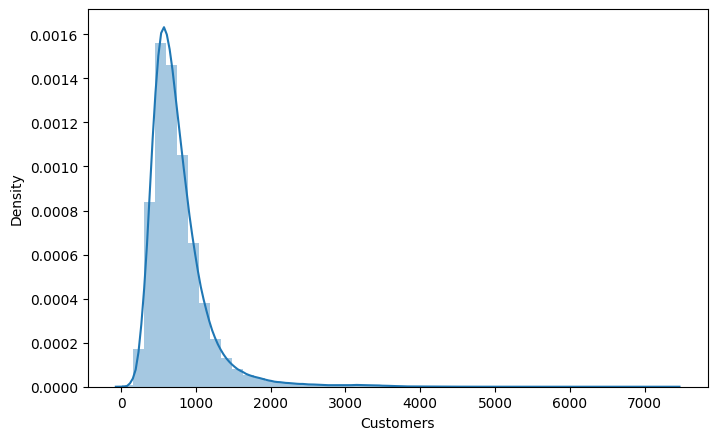

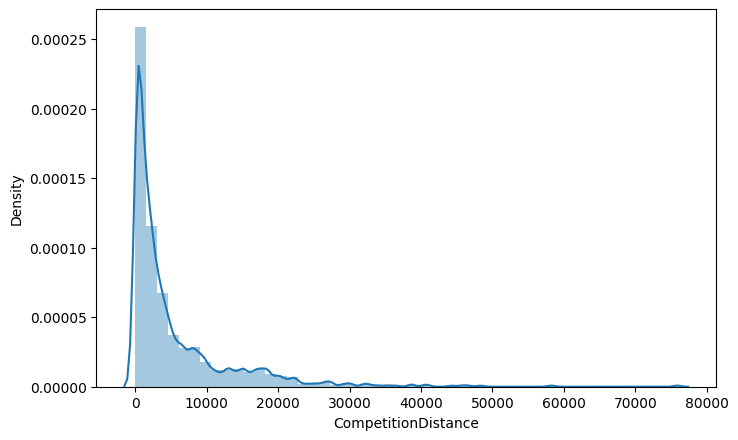

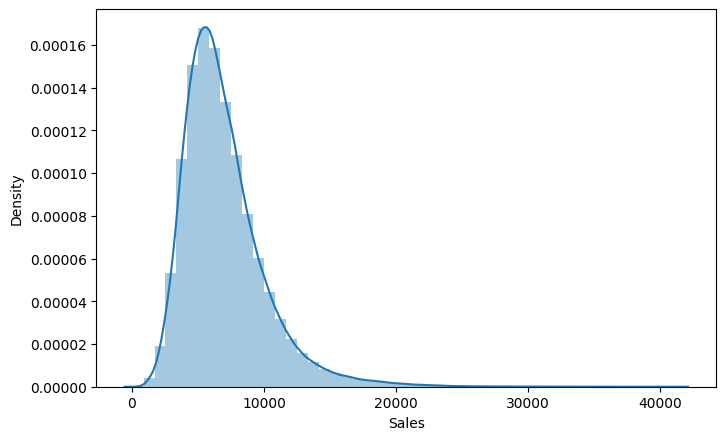

In [101]:
# checking the distribution of continuous variable
continuous_variable_list = ["Customers","CompetitionDistance","Sales"]
for i in continuous_variable_list:
  sns.distplot(df_merged[i])
  plt.show()

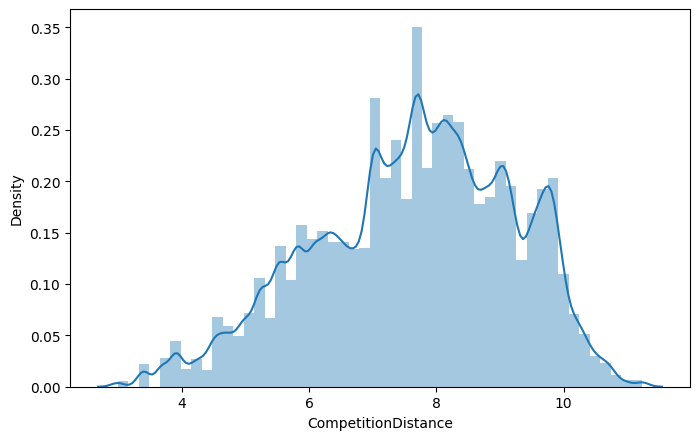

In [102]:
sns.distplot(np.log(df_merged["CompetitionDistance"]))

In [103]:
df_merged["log_CompetitionDistance"] = np.log(df_merged["CompetitionDistance"])
df_merged["log_Sales"] = np.sqrt(df_merged["Sales"])
df_merged["log_customers"] = np.sqrt(df_merged["Customers"])

**Date Extraction**

In [104]:
def extract_year(x):
    return int(str(x)[:4])

def extract_month(x):
    return int(str(x)[5:7])

def extract_month_year(x):
    return (str(x)[:7])

In [105]:
df_merged['Date'] = df_merged['Date'].apply(extract_month_year)
df_sales['Date'] = df_sales['Date'].apply(extract_month_year)
df_merged['Year']  = df_merged['Date'].apply(extract_year)
df_merged['Month'] = df_merged['Date'].apply(extract_month)
df_sales['Year']  = df_sales['Date'].apply(extract_year)
df_sales['Month'] = df_sales['Date'].apply(extract_month)

In [106]:
categorical_variable_list = ['DayOfWeek','Promo','StateHoliday','SchoolHoliday','StoreType',
                             'Assortment','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2',
                             'Promo2SinceWeek','Promo2SinceYear','PromoInterval']

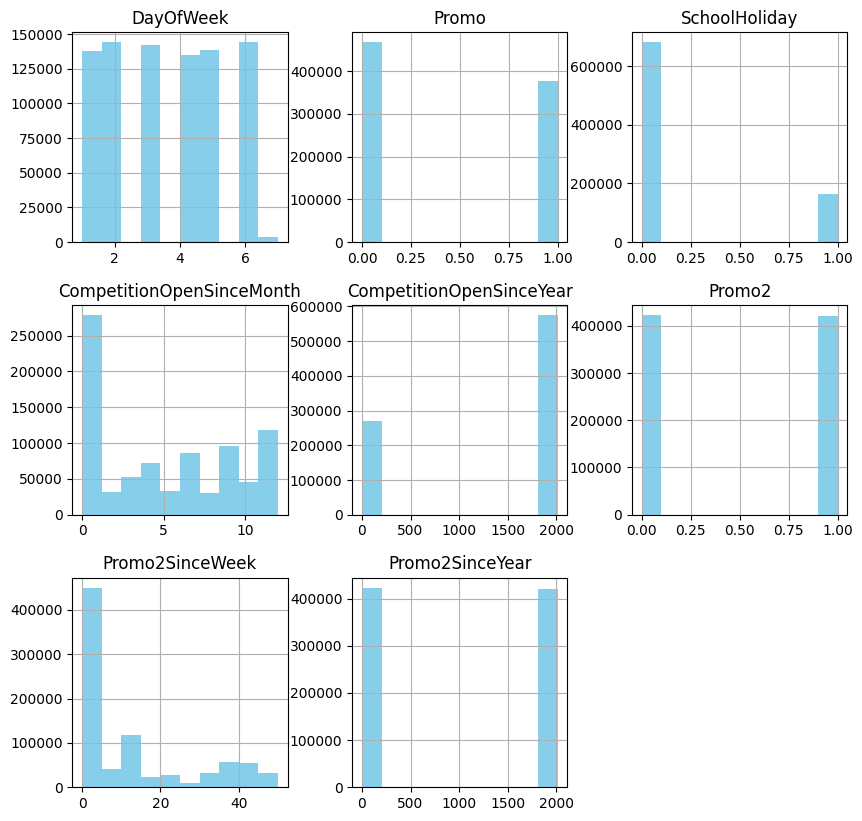

In [107]:
df_merged[categorical_variable_list].hist(color = 'skyblue', figsize= (10,10) )
plt.show()


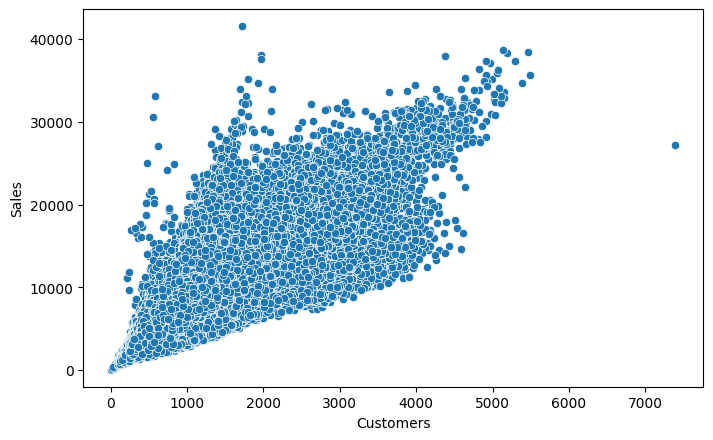

In [108]:
sns.scatterplot(x=df_merged['Customers'], y=df_merged['Sales'])

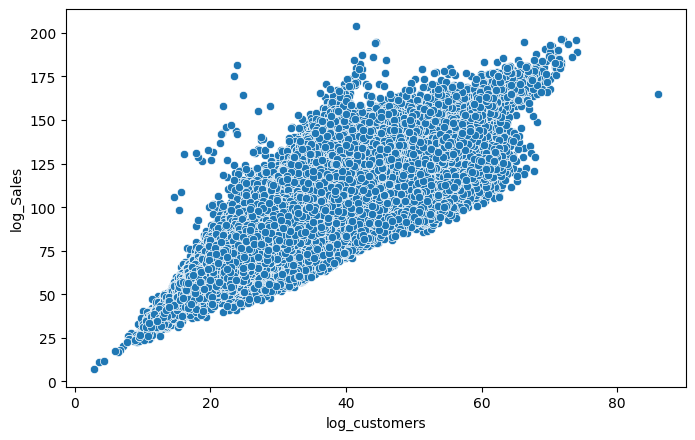

In [109]:
sns.scatterplot(x=df_merged['log_customers'], y=df_merged['log_Sales'])

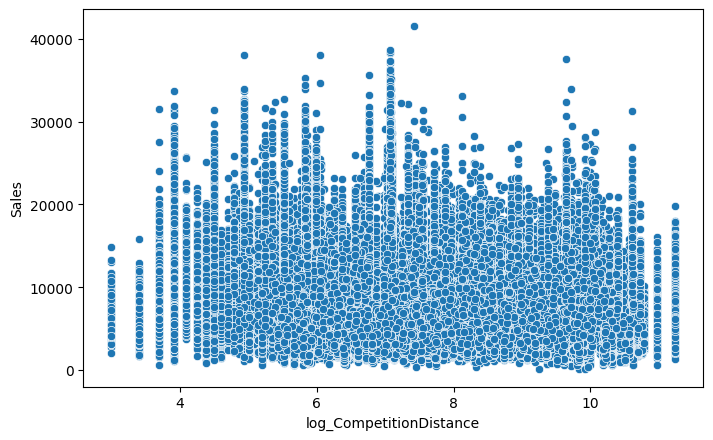

In [110]:
sns.scatterplot(x=df_merged['log_CompetitionDistance'], y=df_merged['Sales'])


Monthly Sales

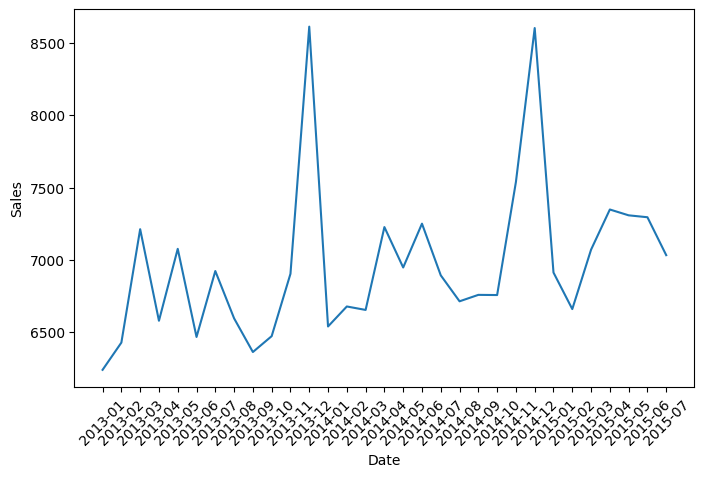

In [111]:
sns.lineplot(data=df_merged.groupby('Date')['Sales'].mean().reset_index(), x='Date', y='Sales')
plt.xticks(rotation= 45)
plt.show()

In [112]:
df_merged["Avg_Customer_Sales"] = df_merged.Sales / df_merged.Customers

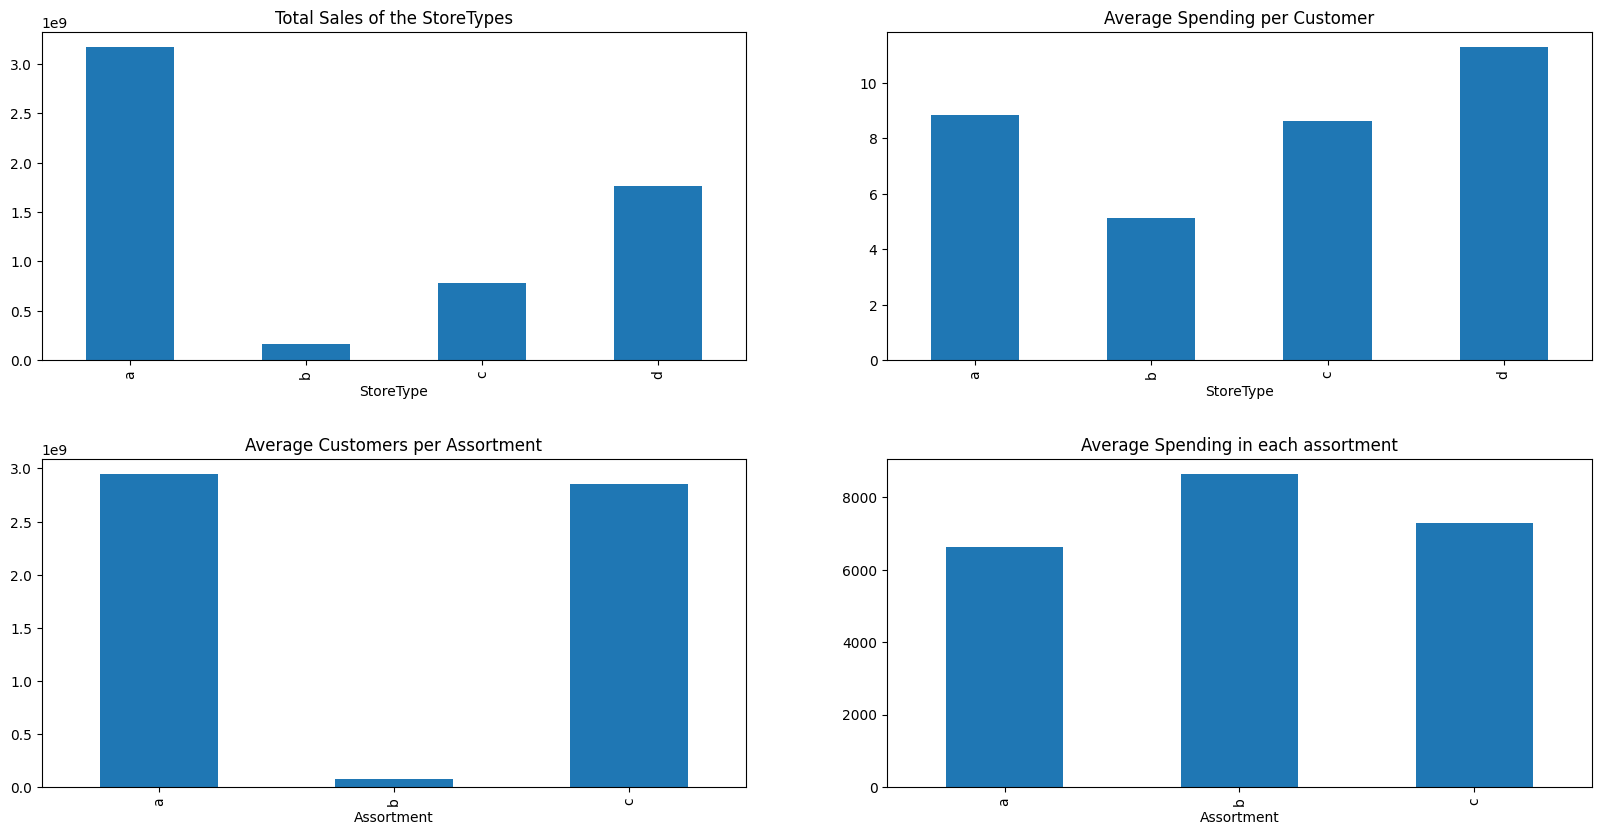

In [113]:
f, ax = plt.subplots(2, 2, figsize = (20,10))

df_merged.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,0], title = "Total Sales of the StoreTypes")
df_merged.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[0,1], title = "Average Spending per Customer")
df_merged.groupby("Assortment")["Sales"].sum().plot(kind = "bar", ax = ax[1,0], title = "Average Customers per Assortment")
df_merged.groupby("Assortment")["Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending in each assortment")

plt.subplots_adjust(hspace = 0.3)
plt.show()

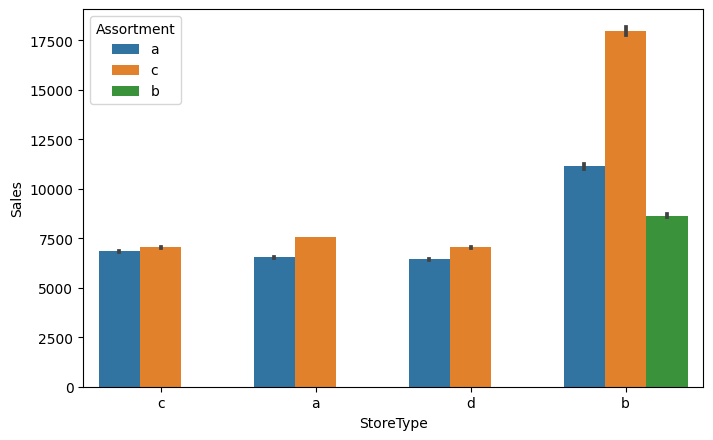

In [114]:
sns.barplot(x=df_merged["StoreType"],y=df_merged['Sales'],hue=df_merged["Assortment"])

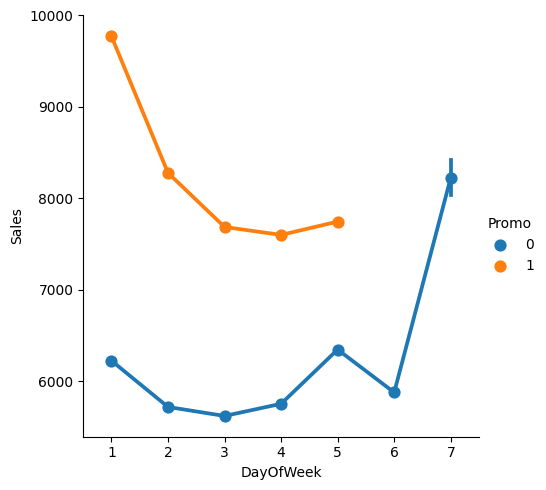

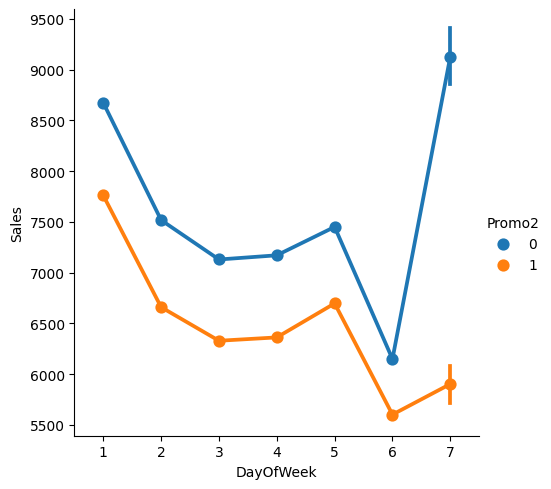

In [115]:
sns.factorplot(data = df_merged, x = "DayOfWeek", y = "Sales", hue = "Promo")
sns.factorplot(data = df_merged, x = "DayOfWeek", y = "Sales", hue = "Promo2")

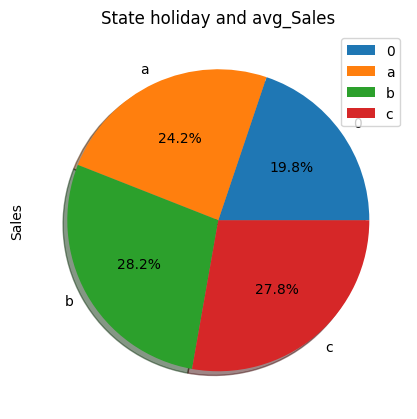

In [116]:
df_merged.groupby("StateHoliday")["Sales"].mean().plot.pie(title='State holiday and avg_Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

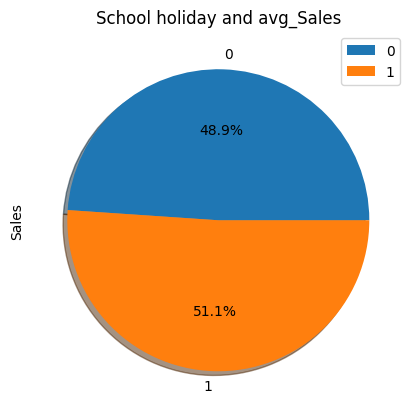

In [117]:
df_merged.groupby("SchoolHoliday")["Sales"].mean().plot.pie(title='School holiday and avg_Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

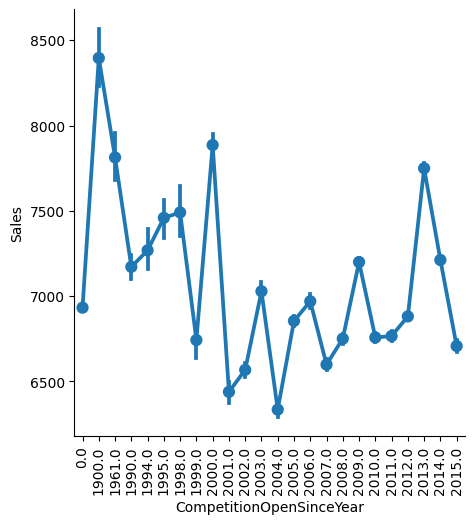

In [118]:
sns.catplot(data=df_merged, x="CompetitionOpenSinceYear", y="Sales", kind="point")
plt.xticks(rotation= 90)
plt.show()

**Feature Engineering**

In [119]:
df_merged["StateHoliday"] = df_merged["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [120]:
df_merged.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,log_CompetitionDistance,log_Sales,log_customers,Year,Month,Avg_Customer_Sales
0,1,5,2015-07,5263,555,1,0,1,c,a,...,0,0.0,0.0,0,7.146772,72.546537,23.558438,2015,7,9.482883
1,2,5,2015-07,6064,625,1,0,1,a,a,...,1,13.0,2010.0,"Jan,Apr,Jul,Oct",6.345636,77.871689,25.000000,2015,7,9.702400
2,3,5,2015-07,8314,821,1,0,1,a,a,...,1,14.0,2011.0,"Jan,Apr,Jul,Oct",9.556055,91.181138,28.653098,2015,7,10.126675
3,4,5,2015-07,13995,1498,1,0,1,c,c,...,0,0.0,0.0,0,6.429719,118.300465,38.704005,2015,7,9.342457
4,5,5,2015-07,4822,559,1,0,1,a,a,...,0,0.0,0.0,0,10.305948,69.440622,23.643181,2015,7,8.626118


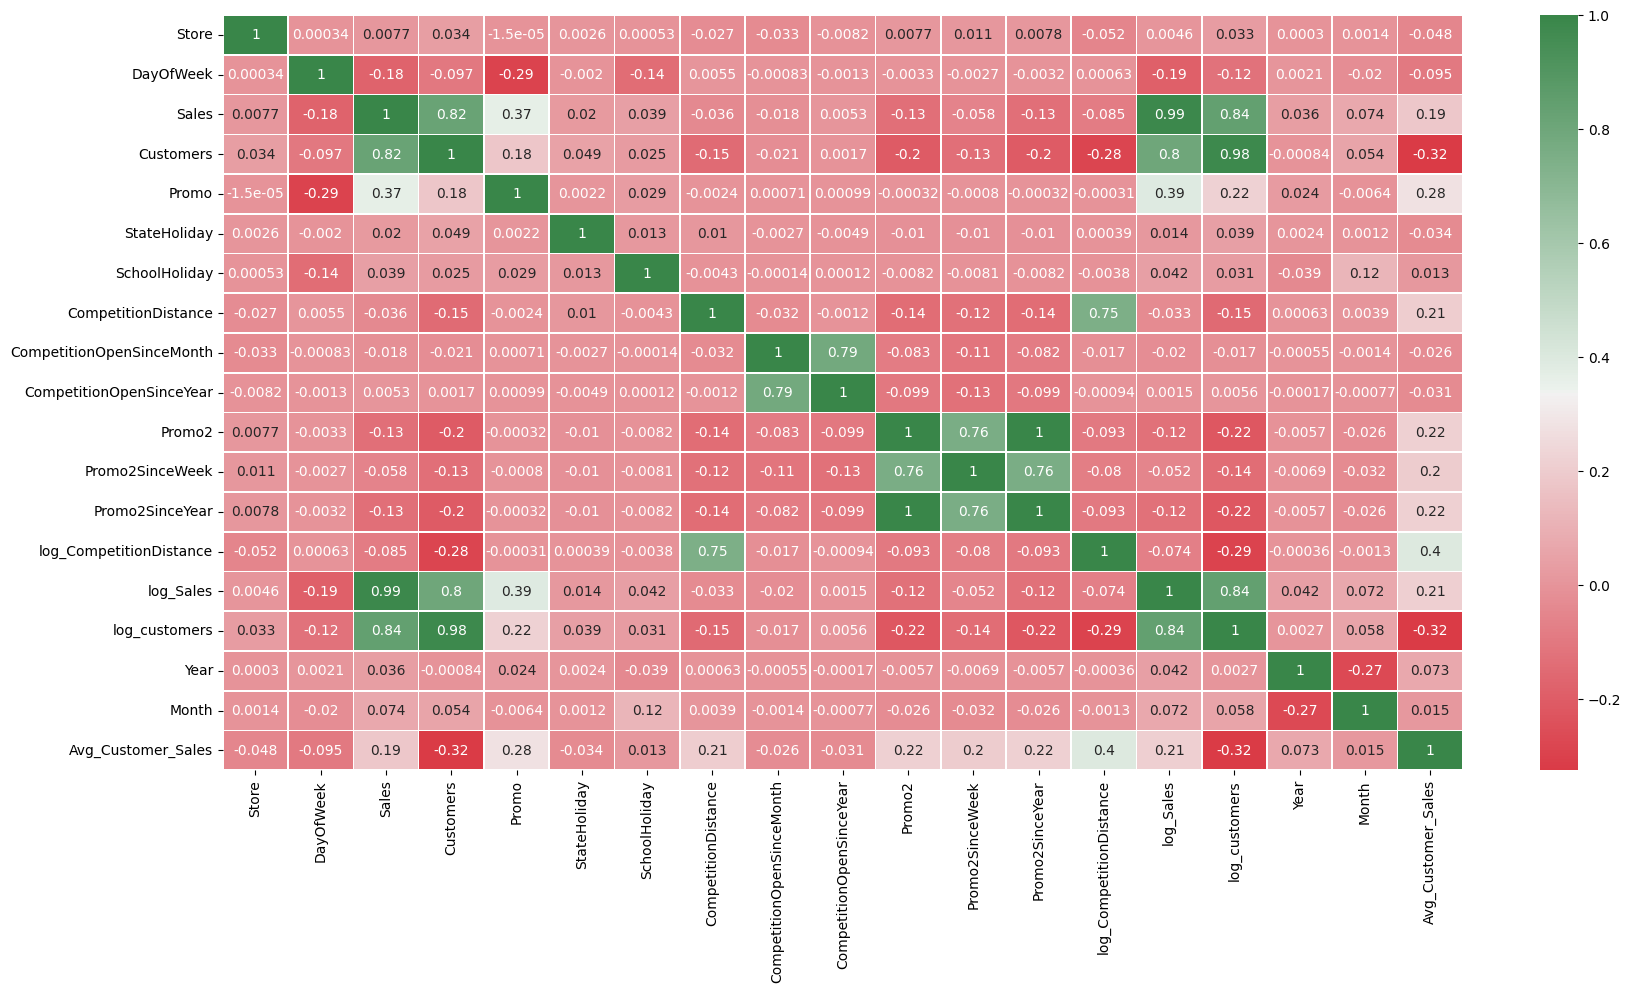

In [121]:
f, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df_merged.corr(),ax = ax, annot=True, cmap=sns.diverging_palette(10, 133, as_cmap=True), linewidths=0.5)

In [122]:
df_merged.head(1)

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,log_CompetitionDistance,log_Sales,log_customers,Year,Month,Avg_Customer_Sales
0,1,5,2015-07,5263,555,1,0,1,c,a,...,0,0.0,0.0,0,7.146772,72.546537,23.558438,2015,7,9.482883


In [123]:
df_merged = pd.get_dummies(df_merged,columns=['StoreType','Assortment','Year'])


In [124]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [125]:
# calc_vif(df_merged[[i for i in df_merged.describe().columns if i not in ['Store','Sales']]])

In [126]:
df_merged.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval',
       'log_CompetitionDistance', 'log_Sales', 'log_customers', 'Month',
       'Avg_Customer_Sales', 'StoreType_a', 'StoreType_b', 'StoreType_c',
       'StoreType_d', 'Assortment_a', 'Assortment_b', 'Assortment_c',
       'Year_2013', 'Year_2014', 'Year_2015'],
      dtype='object')

In [127]:
import statsmodels.api as sm

In [128]:
y = df_merged["log_Sales"]
x1 = df_merged[['DayOfWeek','log_CompetitionDistance','log_customers','StateHoliday', 'SchoolHoliday','Promo','Promo2','StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d','Assortment_a', 'Assortment_b',
       'Assortment_c', 'Year_2013', 'Year_2014', 'Year_2015','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek']]

In [129]:
x=sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Sales   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 3.127e+05
Date:                Sun, 27 Nov 2022   Prob (F-statistic):               0.00
Time:                        13:41:00   Log-Likelihood:            -2.7739e+06
No. Observations:              844338   AIC:                         5.548e+06
Df Residuals:                  844320   BIC:                         5.548e+06
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                        -9.6367      0.039   -248.452      0.000      -9.713      -9.561
DayOfWeek                    -0.1076      0.004    -24.887      0.000      -0.116      -0.099
log_CompetitionDistance       1.5971      0.005    320.351      0.000       1.587       1.607
log_customers                 2.7269      0.001   1973.363      0.000       2.724       2.730
StateHoliday                  0.7084      0.216      3.280      0.001       0.285       1.132
SchoolHoliday                 0.3587      0.018     19.923      0.000       0.323       0.394
Promo                         5.9924      0.015    393.919      0.000       5.963       6.022
Promo2                        1.4420      0.022     64.873      0.000       1.398       1.486
StoreType_a                  -0.3911      0.023    -17.091      0.000      -0.436      -0.346
StoreType_b                 -14.2713      0.061   -233.940      0.000     -14.391     -14.152
StoreType_c                  -1.3354      0.026    -51.145      0.000      -1.387      -1.284
StoreType_d                   6.3611      0.025    252.872      0.000       6.312       6.410
Assortment_a                  3.2165      0.033     96.652      0.000       3.151       3.282
Assortment_b                -17.5079      0.075   -234.881      0.000     -17.654     -17.362
Assortment_c                  4.6547      0.035    134.433      0.000       4.587       4.723
Year_2013                    -3.9832      0.016   -248.418      0.000      -4.015      -3.952
Year_2014                    -3.3985      0.016   -208.964      0.000      -3.430      -3.367
Year_2015                    -2.2550      0.017   -131.282      0.000      -2.289      -2.221
CompetitionOpenSinceMonth    -0.0228      0.003     -8.568      0.000      -0.028      -0.018
CompetitionOpenSinceYear      0.0003   1.23e-05     24.906      0.000       0.000       0.000
Promo2SinceWeek               0.0561      0.001     78.818      0.000       0.055       0.058
==============================================================================
Omnibus:                    51113.581   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           124754.016
Skew:                           0.370   Prob(JB):                         0.00
Kurtosis:                       4.732   Cond. No.                     1.28e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.41e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [130]:
import sklearn
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x1,y,test_size=0.3, random_state=1)

In [131]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(x_train, y_train)

In [132]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
y_predicted = linreg.predict(x_train)
y_test_predicted = linreg.predict(x_test)

print("Regresion Model Score" , ":" , linreg.score(x_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(x_test, y_test))
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8632955855927439 , Out of Sample Test Score : 0.862064226592073
Training RMSE : 6.460382233598736 Testing RMSE : 6.47510882313024
Training MAPE : 6.242246726459644 Testing MAPE : 6.267512195718393


# **LASSO**

In [133]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import Lasso

# lasso = Lasso()
# parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
# lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
# lasso_regressor.fit(x_train, y_train)

# print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
# print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)


# y_predicted = lasso_regressor.predict(x_train)
# y_test_predicted = lasso_regressor.predict(x_test)

# print("Training RMSE", ":", rmse(y_train, y_predicted),
#       "Testing RMSE", ":", rmse(y_test, y_test_predicted))
# print("Training MAPE", ":", mape(y_train, y_predicted),
#       "Testing MAPE", ":", mape(y_test, y_test_predicted))

In [134]:
# from sklearn.linear_model import LassoLars
# las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
# lasreg = las.fit(x_train, y_train)
# print("Regresion Model Score" , ":" , lasreg.score(x_train, y_train) , "," ,
#       "Out of Sample Test Score" ,":" , lasreg.score(x_test, y_test))

# yd_predicted = lasreg.predict(x_train)
# yd_test_predicted = lasreg.predict(x_test)

# print("Training RMSE", ":", rmse(y_train, y_predicted),
#       "Testing RMSE", ":", rmse(y_test, y_test_predicted))
# print("Training MAPE", ":", mape(y_train, y_predicted),
#       "Testing MAPE", ":", mape(y_test, y_test_predicted))

# **Ridge**

In [135]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(x_train, y_train)

# validation
print("Regresion Model Score" , ":" , rdgreg.score(x_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , rdgreg.score(x_test, y_test))

yd_predicted = rdgreg.predict(x_train)
yd_test_predicted = rdgreg.predict(x_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.8632955852299493 , Out of Sample Test Score : 0.8620642913985309
Training RMSE : 6.460382233598736 Testing RMSE : 6.47510882313024
Training MAPE : 6.242246726459644 Testing MAPE : 6.267512195718393


# **Decision Tree**

In [136]:
# from sklearn.tree import DecisionTreeRegressor
# tree = DecisionTreeRegressor(min_samples_leaf=20)
# treereg = tree.fit(x_train, y_train)
# print("Regresion Model Score" , ":" , treereg.score(x_train, y_train) , "," ,
#       "Out of Sample Test Score" ,":" , treereg.score(x_test, y_test))

# yl_predicted = treereg.predict(x_train)
# yl_test_predicted = treereg.predict(x_test)
# print("Training RMSE", ":", rmse(y_train, y_predicted),
#       "Testing RMSE", ":", rmse(y_test, y_test_predicted))
# print("Training MAPE", ":", mape(y_train, y_predicted),
#       "Testing MAPE", ":", mape(y_test, y_test_predicted))

# **Random Forest**

In [137]:
# from sklearn.ensemble import RandomForestRegressor
# rdf = RandomForestRegressor(n_estimators=30)
# rdfreg = rdf.fit(x_train, y_train)
# print("Regresion Model Score" , ":" , rdfreg.score(x_train, y_train) , "," ,
#       "Out of Sample Test Score" ,":" , rdfreg.score(x_test, y_test))   

# y_predicted = rdfreg.predict(x_train)
# y_test_predicted = rdfreg.predict(x_test)

# print("Training RMSE", ":", rmse(y_train, y_predicted),
#       "Testing RMSE", ":", rmse(y_test, y_test_predicted))
# print("Training MAPE", ":", mape(y_train, y_predicted),
#       "Testing MAPE", ":", mape(y_test, y_test_predicted))

In [138]:
# features = x_train.columns
# importances = rdfreg.feature_importances_
# indices = np.argsort(importances)
# plt.figure(figsize=(8,10))
# plt.title('Feature Importances', fontsize=20)
# plt.barh(range(len(indices)), importances[indices], color='pink', align='center')
# plt.yticks(range(len(indices)), features[indices])
# plt.xlabel('Relative Importance')